# Lets build a dataset which only considers 1h time steps starting on 01-01-2020 00:00
### Goal: figure out how much data we would lose



In [3]:
import pandas as pd
from datetime import datetime
import myLibrary as mL

NDBC = mL.NDBC_lib()

In [4]:
#Load from NDBC
#dataset_not_cleaned = NDBC.build_dataset(NDBC.cleaned_stations_GOM, "2020")
#dataset_not_cleaned.to_csv(r"../data/NDBC_historical_stdmet_GOM_2020_original.csv") #Save original data to CSV
#dataset_not_cleaned

In [5]:
#Load from local file
dataset_not_cleaned = pd.read_csv("../data/NDBC_historical_stdmet_GOM_2020_original.csv")
dataset_not_cleaned['timestamp'] = pd.to_datetime(dataset_not_cleaned['timestamp'], format='%Y-%m-%d %H:%M')
dataset_not_cleaned.set_index('timestamp', inplace = True)
dataset_not_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_WYCM6,DPD_WYCM6,APD_WYCM6,MWD_WYCM6,PRES_WYCM6,ATMP_WYCM6,WTMP_WYCM6,DEWP_WYCM6,VIS_WYCM6,TIDE_WYCM6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,999.0,99.0,99.0,0.59,13.33,4.51,78.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1020.4,12.5,15.5,999.0,99.0,99.0
2020-01-01 00:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,1020.4,12.4,15.5,999.0,99.0,99.0
2020-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 00:12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,1020.5,12.2,15.5,999.0,99.0,99.0
2020-01-01 00:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,1020.6,12.2,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:42:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,9999.0,21.2,17.6,999.0,99.0,99.0
2020-12-31 23:48:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,9999.0,21.1,17.5,999.0,99.0,99.0
2020-12-31 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
current_ts = datetime.strptime("2020-01-01 00:00", '%Y-%m-%d %H:%M')
last_ts = datetime.strptime("2021-01-01 00:00", '%Y-%m-%d %H:%M')

timestamp_filter_list = NDBC.create_timestamp_list(current_ts, last_ts)
timestamp_filter_list
#Filter DF by list of inexes
#df = df.filter(items = [2,5], axis=0)

[datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 1, 0),
 datetime.datetime(2020, 1, 1, 2, 0),
 datetime.datetime(2020, 1, 1, 3, 0),
 datetime.datetime(2020, 1, 1, 4, 0),
 datetime.datetime(2020, 1, 1, 5, 0),
 datetime.datetime(2020, 1, 1, 6, 0),
 datetime.datetime(2020, 1, 1, 7, 0),
 datetime.datetime(2020, 1, 1, 8, 0),
 datetime.datetime(2020, 1, 1, 9, 0),
 datetime.datetime(2020, 1, 1, 10, 0),
 datetime.datetime(2020, 1, 1, 11, 0),
 datetime.datetime(2020, 1, 1, 12, 0),
 datetime.datetime(2020, 1, 1, 13, 0),
 datetime.datetime(2020, 1, 1, 14, 0),
 datetime.datetime(2020, 1, 1, 15, 0),
 datetime.datetime(2020, 1, 1, 16, 0),
 datetime.datetime(2020, 1, 1, 17, 0),
 datetime.datetime(2020, 1, 1, 18, 0),
 datetime.datetime(2020, 1, 1, 19, 0),
 datetime.datetime(2020, 1, 1, 20, 0),
 datetime.datetime(2020, 1, 1, 21, 0),
 datetime.datetime(2020, 1, 1, 22, 0),
 datetime.datetime(2020, 1, 1, 23, 0),
 datetime.datetime(2020, 1, 2, 0, 0),
 datetime.datetime(2020, 1, 2, 1, 0)

2020 was a leapyear (=Schaltjahr #German) so it has 366 days. Therefore, there should be 366 * 24 = 8784  timestamps.

In [7]:
len(timestamp_filter_list)

8784

In [8]:
dataset_cleaned = dataset_not_cleaned.filter(timestamp_filter_list, axis=0) #remove all timestamps except those of full hours
dataset_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_WYCM6,DPD_WYCM6,APD_WYCM6,MWD_WYCM6,PRES_WYCM6,ATMP_WYCM6,WTMP_WYCM6,DEWP_WYCM6,VIS_WYCM6,TIDE_WYCM6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,999.0,99.0,99.0,0.59,13.33,4.51,78.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1020.4,12.5,15.5,999.0,99.0,99.0
2020-01-01 01:00:00,999.0,99.0,99.0,0.57,14.29,4.41,80.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1020.5,11.3,15.5,999.0,99.0,99.0
2020-01-01 02:00:00,999.0,99.0,99.0,0.49,14.29,4.58,69.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1020.9,10.9,15.6,999.0,99.0,99.0
2020-01-01 03:00:00,999.0,99.0,99.0,0.52,7.69,4.23,98.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1020.9,10.3,15.6,999.0,99.0,99.0
2020-01-01 04:00:00,999.0,99.0,99.0,0.51,15.38,3.79,62.0,9999.0,999.0,17.4,...,99.0,99.0,99.0,999.0,1021.0,9.5,15.5,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,9999.0,22.2,999.0,999.0,99.0,99.0
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,9999.0,22.0,17.0,999.0,99.0,99.0
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.0,99.0,99.0,999.0,9999.0,21.0,16.9,999.0,99.0,99.0


Why are there only 8777 rows? What happened to the missing 7 rows?

... probably there is simply no data for 3 timestamps!

In [9]:
NDBC.print_NaN_statistic(dataset_not_cleaned, "Complete Dataset:")
NDBC.print_NaN_statistic(dataset_cleaned, "Filtered by 1h timesteps:")


 Complete Dataset:
number of values:  211832322
number of NaN values:  106130427 ( 50.1 %)


 Filtered by 1h timesteps:
number of values:  14034423
number of NaN values:  1582087 ( 11.27 %)



(14034423,
 11.27,
          Feature  #NaN   %NaN
 0     WDIR_41117  4932  56.19
 1     WSPD_41117  4932  56.19
 2      GST_41117  4932  56.19
 3     WVHT_41117  4932  56.19
 4      DPD_41117  4932  56.19
 ...          ...   ...    ...
 1594  ATMP_WYCM6   502   5.72
 1595  WTMP_WYCM6   502   5.72
 1596  DEWP_WYCM6   502   5.72
 1597   VIS_WYCM6   502   5.72
 1598  TIDE_WYCM6   502   5.72
 
 [1599 rows x 3 columns])

In [10]:
del dataset_not_cleaned #To save memory!

# Next step: research about how to handle NaN values in big data analysis

is removing the data an option? How many rows do include NaN values?

In [11]:
num_rows_NaN_cleaned = dataset_cleaned.isna().any(axis=1).sum()
num_rows_NaN_cleaned_percentage = round(100 * dataset_cleaned.shape[0] / num_rows_NaN_cleaned, 2)
print("Number of rows with NaN values: ", num_rows_NaN_cleaned, " (",num_rows_NaN_cleaned_percentage,"%)")

num_cols_NaN_cleaned = dataset_cleaned.isna().any(axis=0).sum()
num_cols_NaN_cleaned_percentage = round(100 * dataset_cleaned.shape[1] / num_cols_NaN_cleaned, 2)
print("Number of columns with NaN values: ", num_cols_NaN_cleaned, " (",num_cols_NaN_cleaned_percentage,"%)")

Number of rows with NaN values:  8777  ( 100.0 %)
Number of columns with NaN values:  1599  ( 100.0 %)


So removing columns with NaN values is not an option :D

## The numbers 9999, 999 and 99 also represent missing data, so lets convert them to NaN!

In [12]:
dataset_cleaned = NDBC.replace_with_NaN(dataset_cleaned)  #overwrite data to save memory
dataset_cleaned

,WDIR_41117,WSPD_41117,GST_41117,WVHT_41117,DPD_41117,APD_41117,MWD_41117,PRES_41117,ATMP_41117,WTMP_41117,...,WVHT_WYCM6,DPD_WYCM6,APD_WYCM6,MWD_WYCM6,PRES_WYCM6,ATMP_WYCM6,WTMP_WYCM6,DEWP_WYCM6,VIS_WYCM6,TIDE_WYCM6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,NaN,NaN,NaN,0.59,13.33,4.51,78.0,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.4,12.5,15.5,NaN,NaN,NaN
2020-01-01 01:00:00,NaN,NaN,NaN,0.57,14.29,4.41,80.0,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.5,11.3,15.5,NaN,NaN,NaN
2020-01-01 02:00:00,NaN,NaN,NaN,0.49,14.29,4.58,69.0,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.9,10.9,15.6,NaN,NaN,NaN
2020-01-01 03:00:00,NaN,NaN,NaN,0.52,7.69,4.23,98.0,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1020.9,10.3,15.6,NaN,NaN,NaN
2020-01-01 04:00:00,NaN,NaN,NaN,0.51,15.38,3.79,62.0,NaN,NaN,17.4,...,NaN,NaN,NaN,NaN,1021.0,9.5,15.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.2,NaN,NaN,NaN,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,22.0,17.0,NaN,NaN,NaN
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21.0,16.9,NaN,NaN,NaN


In [13]:
#type(dataset_cleaned["WDIR_41117"][0])

In [14]:
dataset_cleaned_no_NaN = NDBC.drop_NaN_rows_and_cols(dataset_cleaned)
dataset_cleaned_no_NaN

,WVHT_41117,DPD_41117,APD_41117,MWD_41117,WTMP_41117,WVHT_41112,DPD_41112,APD_41112,MWD_41112,ATMP_41112,...,WTMP_WIWF1,TIDE_WIWF1,WTMP_WPLF1,TIDE_WPLF1,WDIR_WYCM6,WSPD_WYCM6,GST_WYCM6,PRES_WYCM6,ATMP_WYCM6,WTMP_WYCM6
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.59,13.33,4.51,78.0,17.4,0.42,15.38,3.97,85.0,NaN,...,25.1,-0.02,25.4,0.23,247.0,2.9,4.0,1020.4,12.5,15.5
2020-01-01 01:00:00,0.57,14.29,4.41,80.0,17.4,0.36,15.38,4.26,85.0,NaN,...,25.1,0.04,25.4,-0.06,281.0,3.2,4.2,1020.5,11.3,15.5
2020-01-01 02:00:00,0.49,14.29,4.58,69.0,17.4,0.39,15.38,4.03,90.0,NaN,...,25.1,0.07,25.5,-0.28,274.0,2.7,3.3,1020.9,10.9,15.6
2020-01-01 03:00:00,0.52,7.69,4.23,98.0,17.4,0.38,9.09,3.54,108.0,NaN,...,25.1,0.04,25.5,-0.51,279.0,2.9,3.4,1020.9,10.3,15.6
2020-01-01 04:00:00,0.51,15.38,3.79,62.0,17.4,0.41,14.29,3.75,83.0,NaN,...,25.0,-0.01,25.4,-0.69,298.0,1.5,1.7,1021.0,9.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,NaN,NaN,NaN,NaN,NaN,1.37,8.70,5.57,110.0,18.1,...,22.4,0.18,21.3,-0.02,120.0,6.6,7.8,NaN,22.2,NaN
2020-12-31 20:00:00,NaN,NaN,NaN,NaN,NaN,1.42,8.33,5.51,109.0,17.6,...,22.8,0.17,21.4,0.28,119.0,7.5,9.6,NaN,22.0,17.0
2020-12-31 21:00:00,NaN,NaN,NaN,NaN,NaN,1.46,7.41,5.56,109.0,18.1,...,22.9,0.20,21.6,0.28,117.0,9.8,11.4,NaN,21.0,16.9


There was no row which only exists of NaN values. This makes sense, since otherwise it would not have been added. But we could reduce the number of columns (=features) from 1599 to 625!

In [15]:
del dataset_cleaned #save memory

In [16]:
num_values, num_NaN_percentage, NaN_by_feature = NDBC.print_NaN_statistic(dataset_cleaned_no_NaN, "Dataset after removing NaN-Columns:")
NaN_by_feature


 Dataset after removing NaN-Columns:
number of values:  5485625
number of NaN values:  984790 ( 17.95 %)



,Feature,#NaN,%NaN
0,WVHT_41117,4932,56.19
1,DPD_41117,4945,56.34
2,APD_41117,4932,56.19
3,MWD_41117,5011,57.09
4,WTMP_41117,4933,56.20
...,...,...,...
620,WSPD_WYCM6,1217,13.87
621,GST_WYCM6,1241,14.14
622,PRES_WYCM6,1072,12.21
623,ATMP_WYCM6,1184,13.49


There are still almost 1 mio NaN values ...

In [17]:
num_rows_NaN_cleaned = dataset_cleaned_no_NaN.isna().any(axis=1).sum()
num_rows_NaN_cleaned_percentage = round(100 * dataset_cleaned_no_NaN.shape[0] / num_rows_NaN_cleaned, 2)
print("Number of rows with NaN values: ", num_rows_NaN_cleaned, " (",num_rows_NaN_cleaned_percentage,"%)")

num_cols_NaN_cleaned = dataset_cleaned_no_NaN.isna().any(axis=0).sum()
num_cols_NaN_cleaned_percentage = round(100 * dataset_cleaned_no_NaN.shape[1] / num_cols_NaN_cleaned, 2)
print("Number of columns with NaN values: ", num_cols_NaN_cleaned, " (",num_cols_NaN_cleaned_percentage,"%)")

Number of rows with NaN values:  8777  ( 100.0 %)
Number of columns with NaN values:  625  ( 100.0 %)


… still at least one NaN value in each column and each row!

# Save dataframe to CSV

In [18]:
dataset_cleaned_no_NaN.to_csv(r"../data/NDBC_historical_stdmet_GOM_2020_cleaned.csv")


# Visualizing NaN Values:

In [19]:
import missingno as msno

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (625).

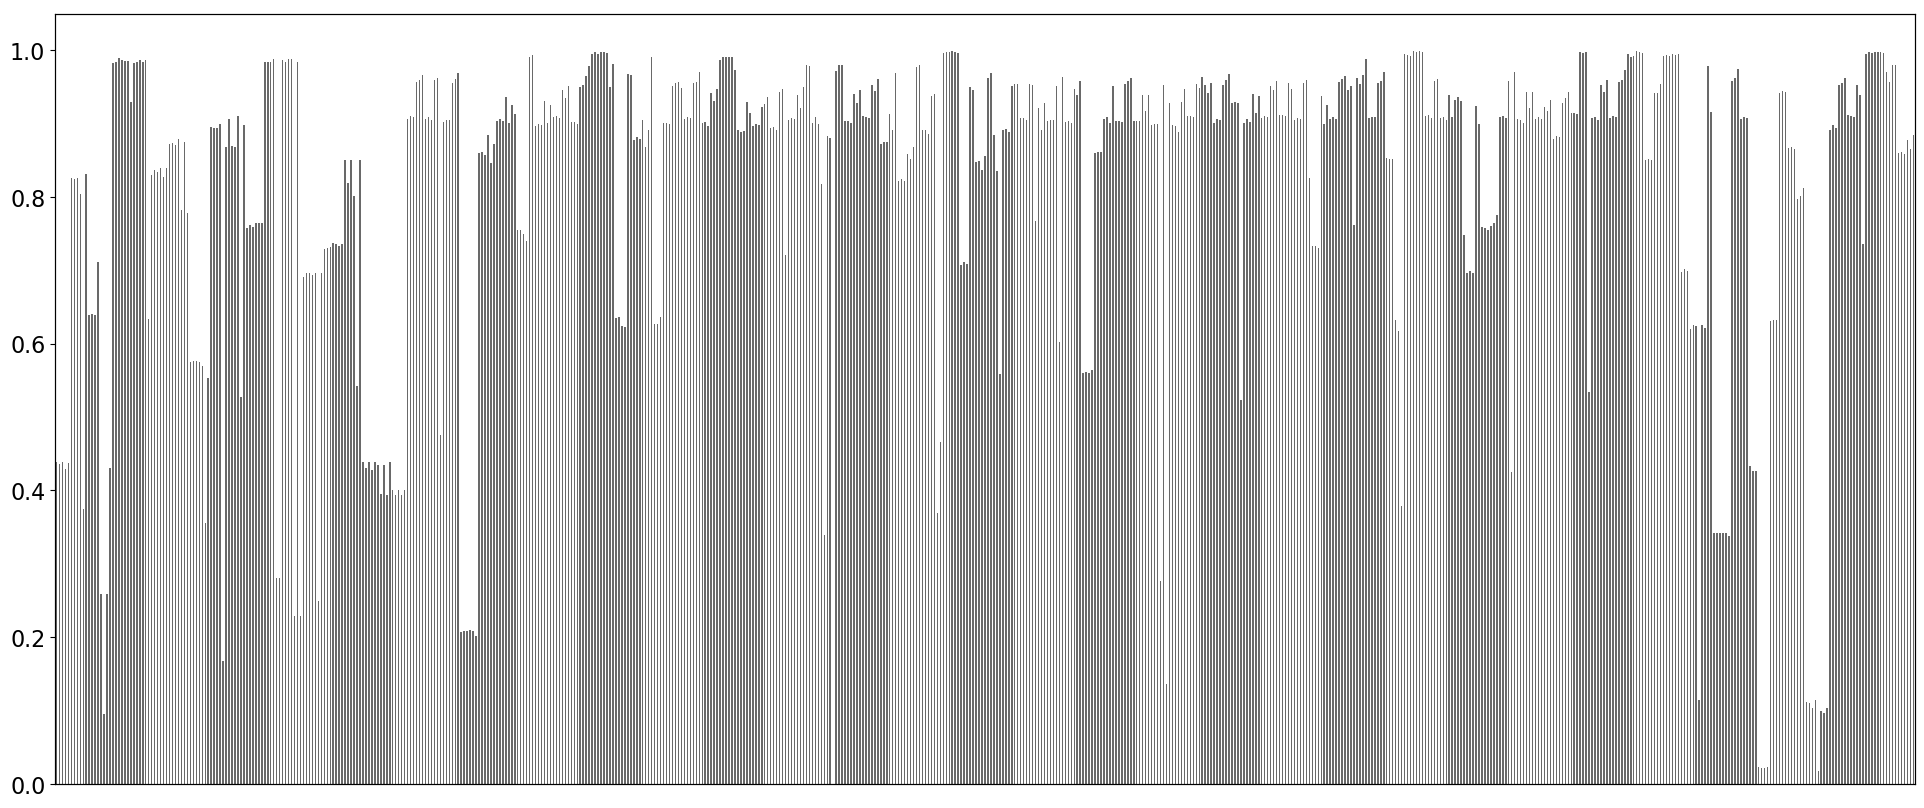

In [20]:
msno.bar(dataset_cleaned_no_NaN)

Interpretation of the graph above: The shorter the white bar, the smaller is the amount of valid data values in each column.

<AxesSubplot:>

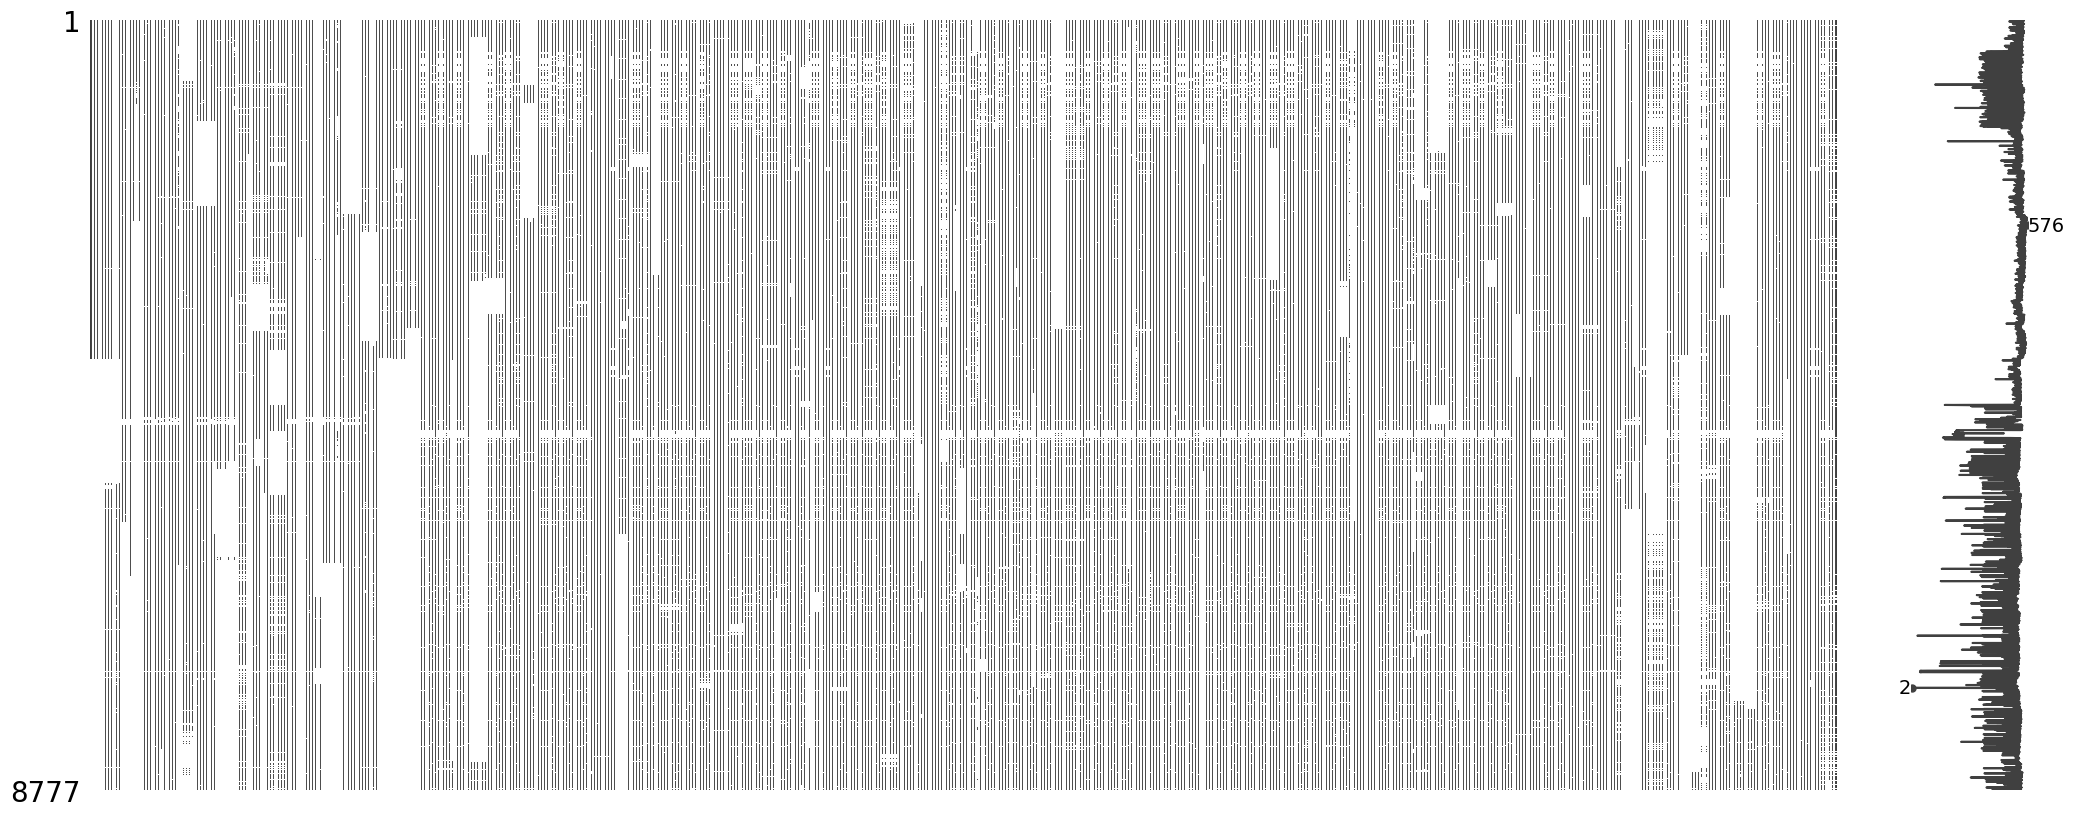

In [21]:
msno.matrix(dataset_cleaned_no_NaN)

## ISSUE:
When reading from CSV, it seems like there are some columns with only NaN values. Why is there a difference and why do they still exist? ... probably related to datatype (string, float, int) and the function drop_NaN_rows_and_cols!

White = valid data, Black = NaN

----
## What is the white line in the middle of the year?

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (8777).

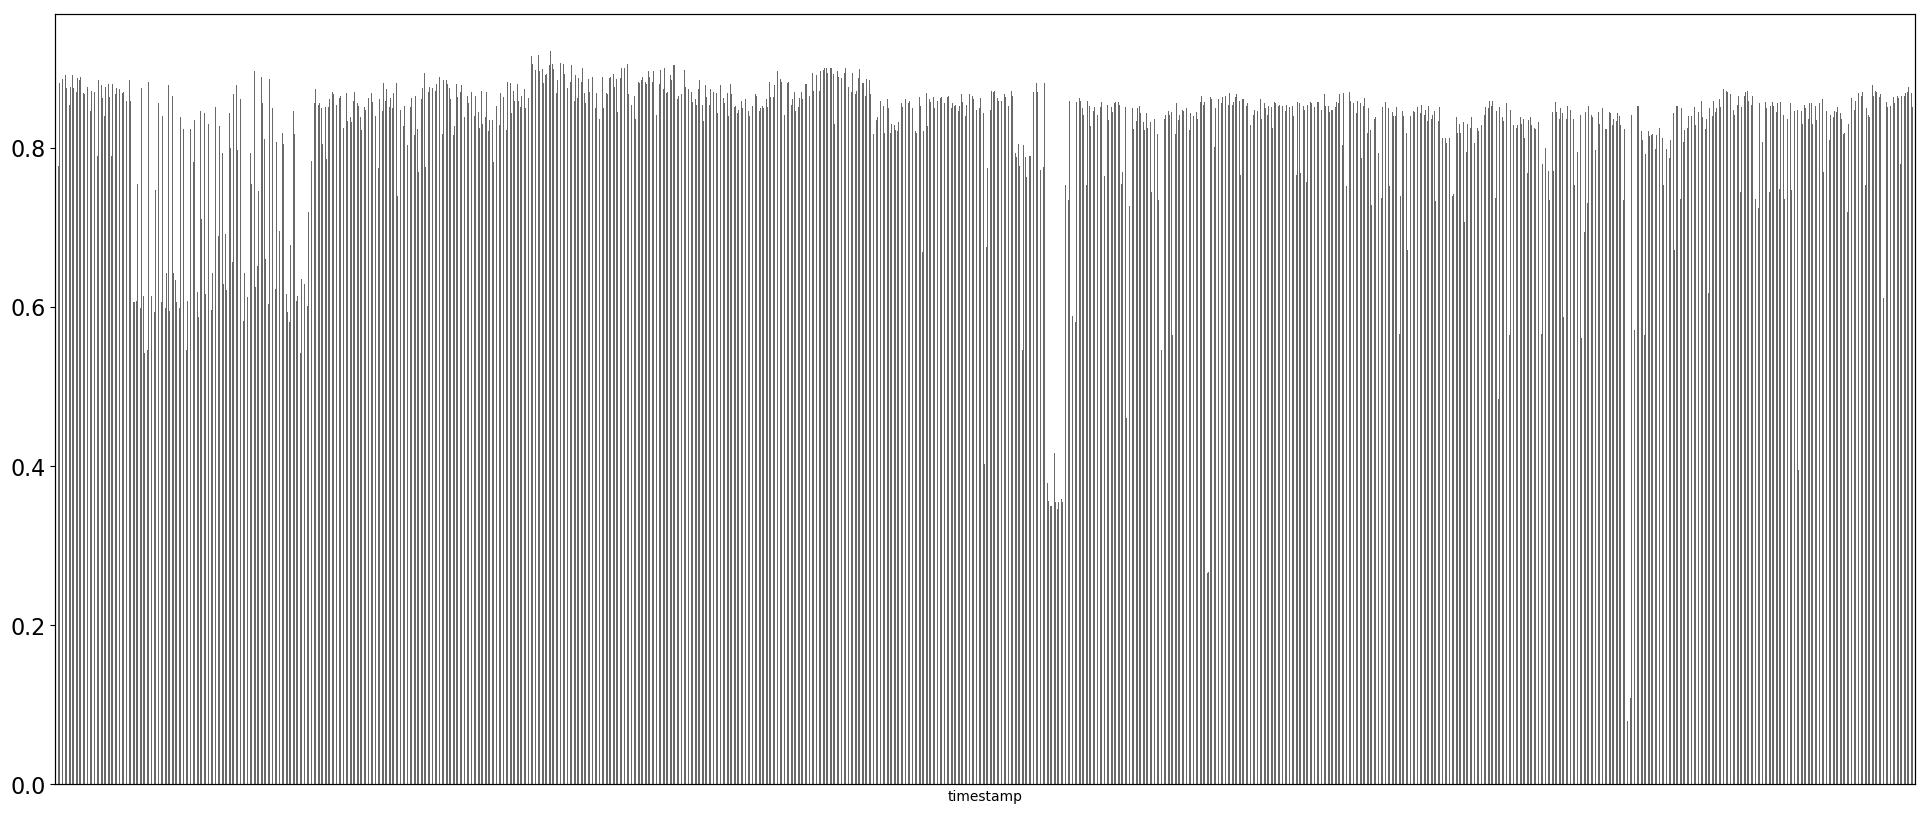

In [22]:
#loop all timesteps
#count num of NaN per timestep
dataset_cleaned_no_NaN_transpose = dataset_cleaned_no_NaN.T # t .. transpose (=switch rows and columns) -- cols = timesteps, rows = features
msno.bar(dataset_cleaned_no_NaN_transpose)

ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (744).

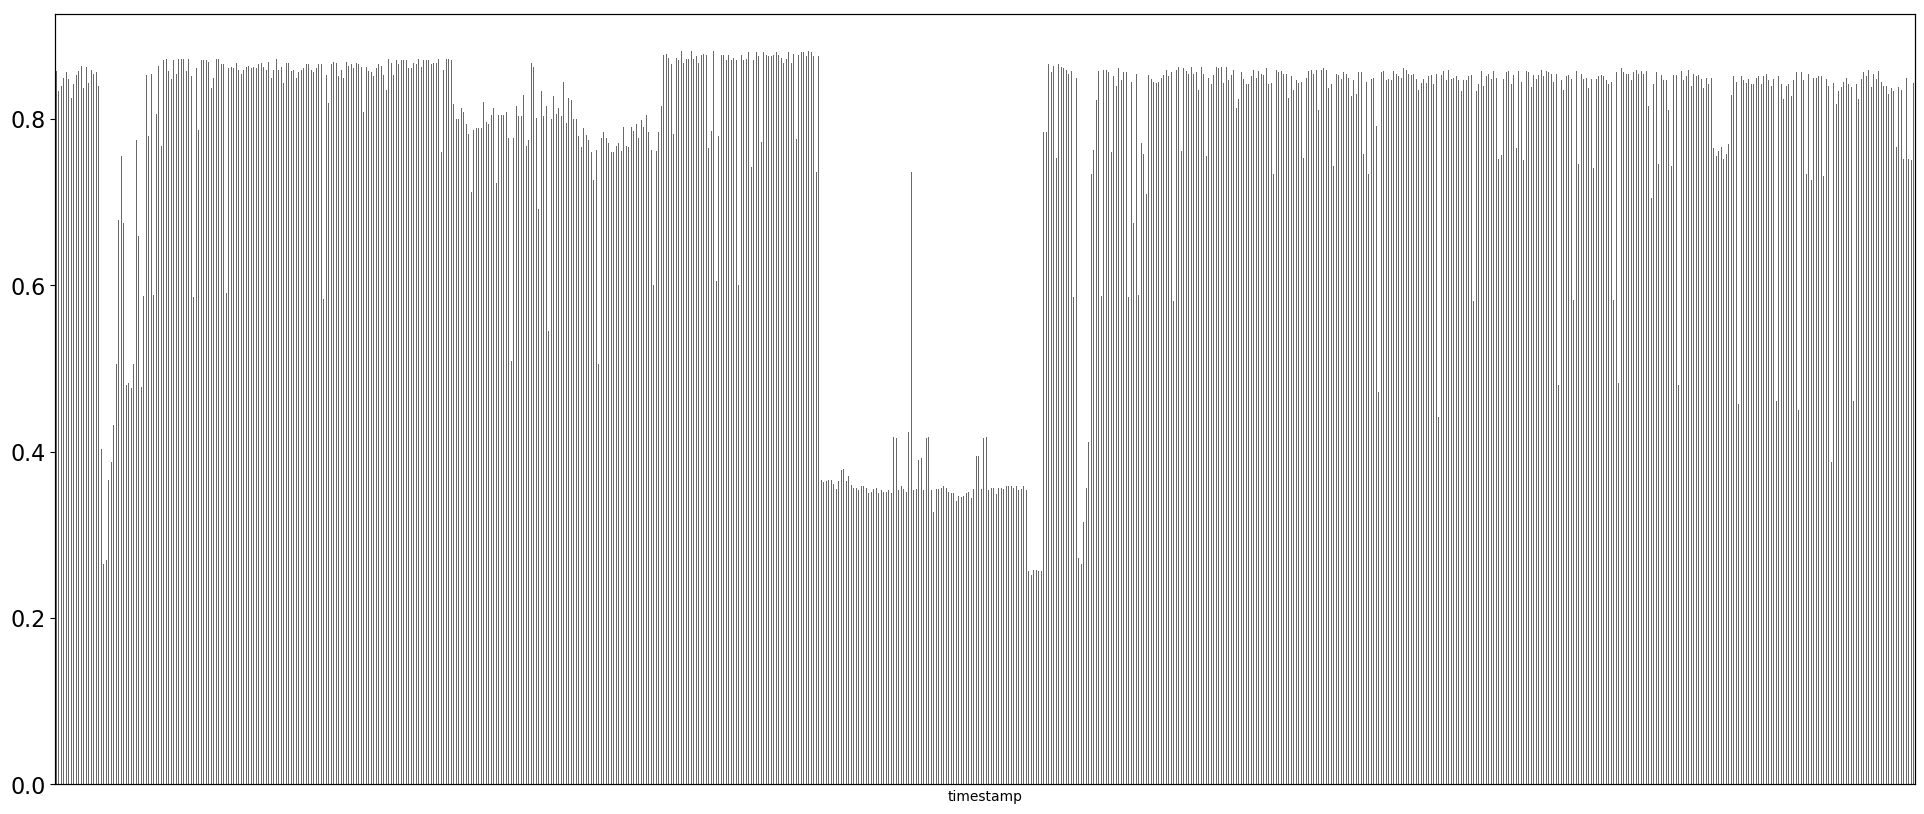

In [24]:
first_timestamp = datetime.strptime("2020-07-01 00:00", '%Y-%m-%d %H:%M')
last_timestamp = datetime.strptime("2020-08-01 00:00", '%Y-%m-%d %H:%M')

timestep_filter_list = NDBC.create_timestamp_list(first_timestamp, last_timestamp)

dataset_cleaned_no_NaN_transpose_filtered = dataset_cleaned_no_NaN_transpose.filter(timestep_filter_list)
#dataset_cleaned_no_NaN_transpose_filtered
msno.bar(dataset_cleaned_no_NaN_transpose_filtered)

<AxesSubplot:xlabel='timestamp'>

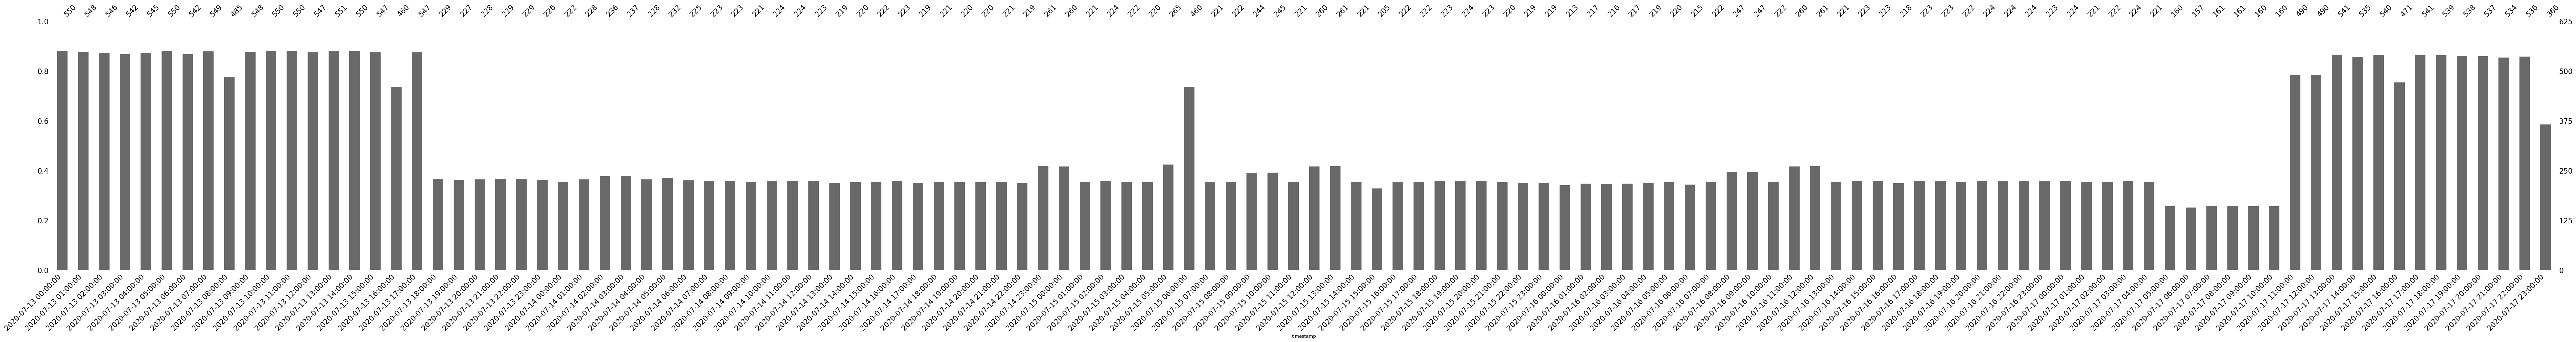

In [25]:
first_timestamp = datetime.strptime("2020-07-13 00:00", '%Y-%m-%d %H:%M')
last_timestamp = datetime.strptime("2020-07-18 00:00", '%Y-%m-%d %H:%M')

timestep_filter_list = NDBC.create_timestamp_list(first_timestamp, last_timestamp)

dataset_cleaned_no_NaN_transpose_filtered = dataset_cleaned_no_NaN_transpose.filter(timestep_filter_list)
#dataset_cleaned_no_NaN_transpose_filtered
msno.bar(dataset_cleaned_no_NaN_transpose_filtered, labels=True, figsize=(100, 10))

Between 2020-07-13 18:00 and 2020-07-17 11:00 more than 60% of the values are missed. Could be caused by hurricanes.

-----


## Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009


<AxesSubplot:>

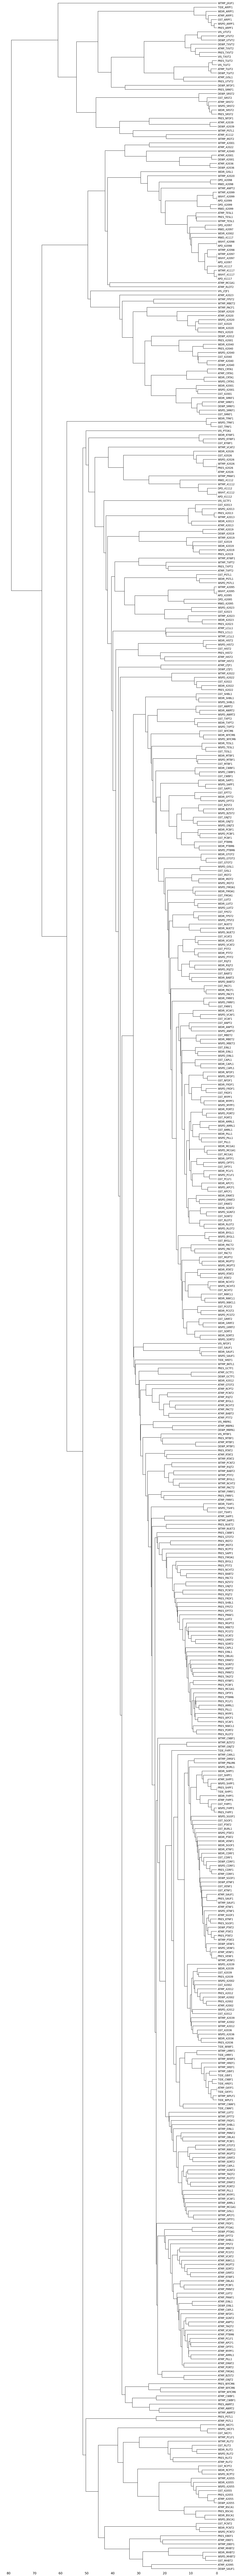

In [26]:
msno.dendrogram(dataset_cleaned_no_NaN)